In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [5]:
import seaborn as sns

In [6]:
from tensorflow.keras.preprocessing import image

In [7]:
from PIL import Image

In [8]:
base_dir = "/content/drive/Othercomputers/Mac/huge_projects/aircraft_reco/final_data"

In [9]:
train_dir = base_dir + '/train'
test_dir = base_dir + '/test'

# Repertoires des images d'entrainement et de test
a_320_train_dir = train_dir + '/Airbus_320'
a_320_test_dir = test_dir + '/Airbus_320'

a_340_train_dir = train_dir + '/Airbus_340'
a_340_test_dir = test_dir + '/Airbus_340'

a_380_train_dir = train_dir + '/Airbus_380'
a_380_test_dir = test_dir + '/Airbus_380'

b_737_train_dir = train_dir + '/Boeing_737'
b_737_test_dir = test_dir + '/Boeing_737'

b_747_train_dir = train_dir + '/Boeing_747'
b_747_test_dir = test_dir + '/Boeing_747'

b_767_train_dir = train_dir + '/Boeing_767'
b_767_test_dir = test_dir + '/Boeing_767'

embraer_ejet_train_dir = train_dir + '/Embraer_ejet'
embraer_ejet_test_dir = test_dir + '/Embraer_ejet'

In [10]:
print('total training A320 images :', len(os.listdir(      a_320_train_dir ) ))
print('total training A340 images :', len(os.listdir(      a_340_train_dir ) ))
print('total training A380 images :', len(os.listdir(      a_380_train_dir ) ))
print('total training B737 images :', len(os.listdir(      b_737_train_dir ) ))
print('total training B747 images :', len(os.listdir(      b_747_train_dir ) ))
print('total training B767 images :', len(os.listdir(      b_767_train_dir ) ))
print('total training EEJET images :', len(os.listdir(      embraer_ejet_train_dir ) ))
print()
print('total test A320 images :', len(os.listdir(      a_320_test_dir ) ))
print('total test A340 images :', len(os.listdir(      a_340_test_dir ) ))
print('total test A380 images :', len(os.listdir(      a_380_test_dir ) ))
print('total test B737 images :', len(os.listdir(      b_737_test_dir ) ))
print('total test B747 images :', len(os.listdir(      b_747_test_dir ) ))
print('total test B767 images :', len(os.listdir(      b_767_test_dir ) ))
print('total test EEJET images :', len(os.listdir(      embraer_ejet_test_dir ) ))

total training A320 images : 100
total training A340 images : 100
total training A380 images : 100
total training B737 images : 100
total training B747 images : 100
total training B767 images : 100
total training EEJET images : 90

total test A320 images : 10
total test A340 images : 10
total test A380 images : 10
total test B737 images : 10
total test B747 images : 10
total test B767 images : 10
total test EEJET images : 10


## Plots

In [11]:
def plot_samples(dir, sample):

    plt.figure(figsize = (12,8))

    for i, aircraft in enumerate(sample):

        if aircraft != '.DS_Store':
            ax = plt.subplot(3,4,i+1)
            img = mpimg.imread(os.path.join(dir, aircraft))
            plt.axis("off")
            plt.imshow(img)
            ax.set_title(aircraft)

A 320

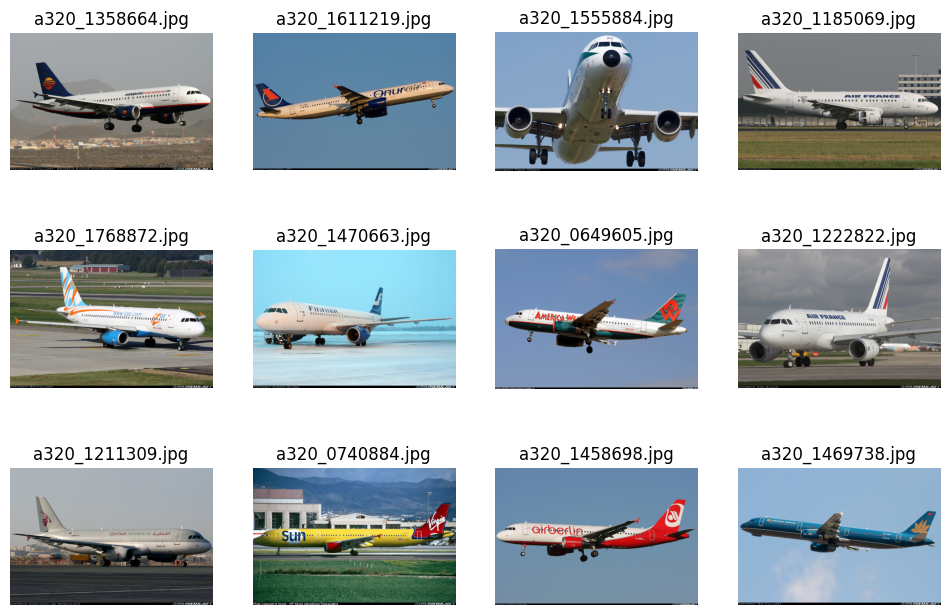

In [13]:
a_320_sample = np.random.choice(os.listdir(a_320_train_dir),size = 12)
plot_samples(a_320_train_dir, a_320_sample)

A 340

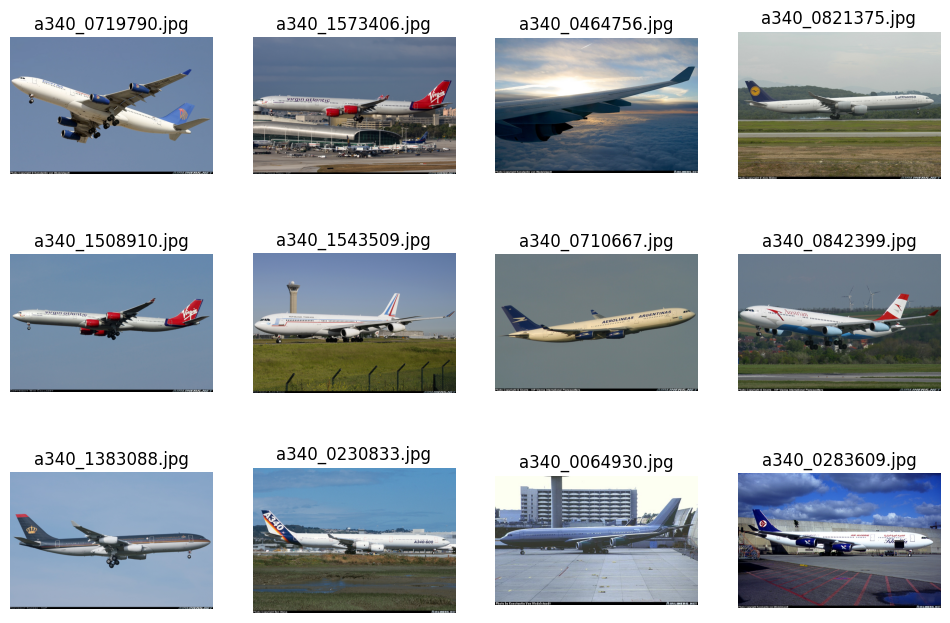

In [14]:
a_340_sample = np.random.choice(os.listdir(a_340_train_dir),size = 12)
plot_samples(a_340_train_dir, a_340_sample)

A 380

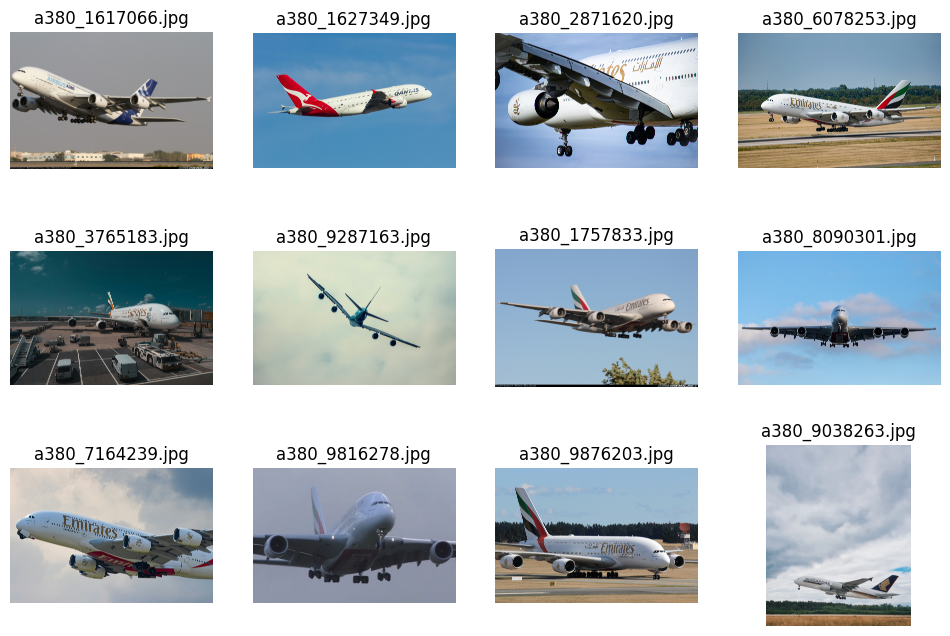

In [15]:
a_380_sample = np.random.choice(os.listdir(a_380_train_dir),size = 12)
plot_samples(a_380_train_dir, a_380_sample)

B 737

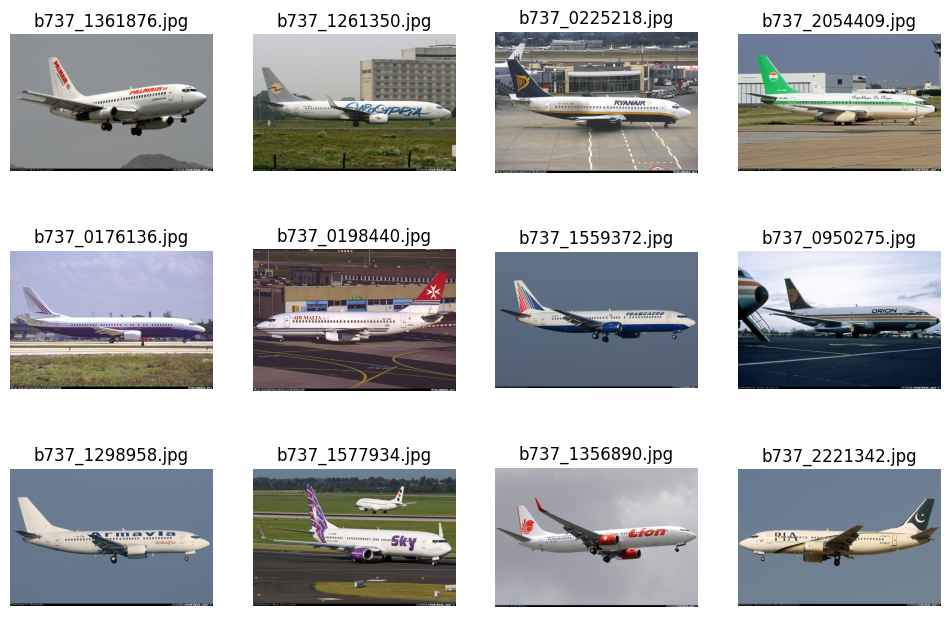

In [16]:
b_737_sample = np.random.choice(os.listdir(b_737_train_dir),size = 12)
plot_samples(b_737_train_dir, b_737_sample)

B 747

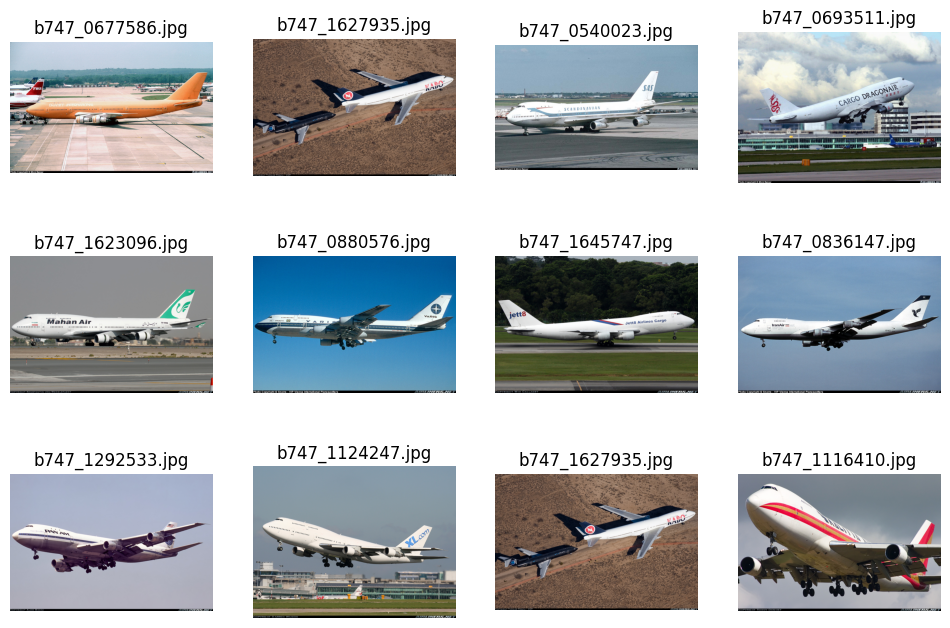

In [17]:
b_747_sample = np.random.choice(os.listdir(b_747_train_dir),size = 12)
plot_samples(b_747_train_dir, b_747_sample)

B 767

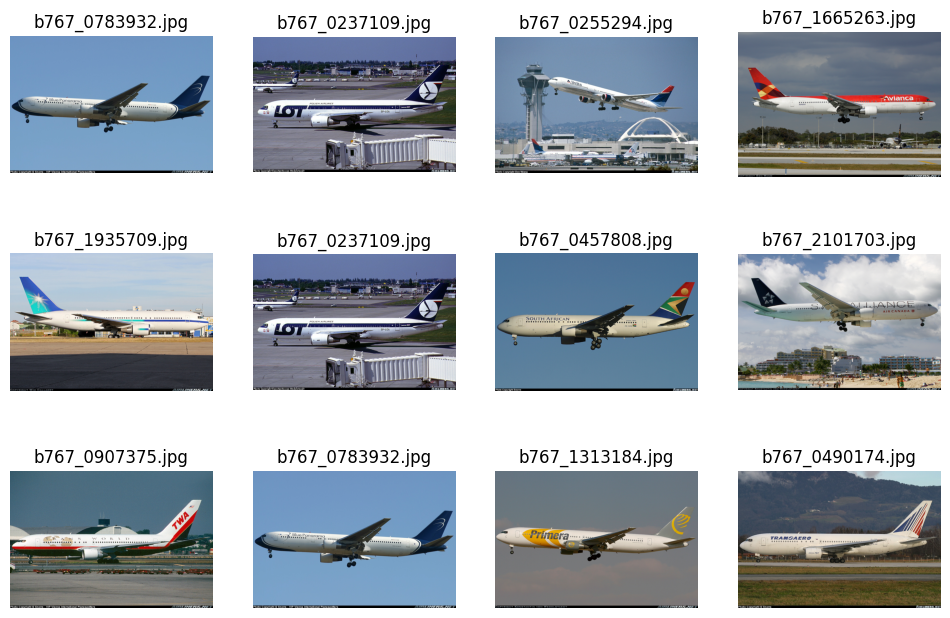

In [18]:
b_767_sample = np.random.choice(os.listdir(b_767_train_dir),size = 12)
plot_samples(b_767_train_dir, b_767_sample)

Embraer Ejet

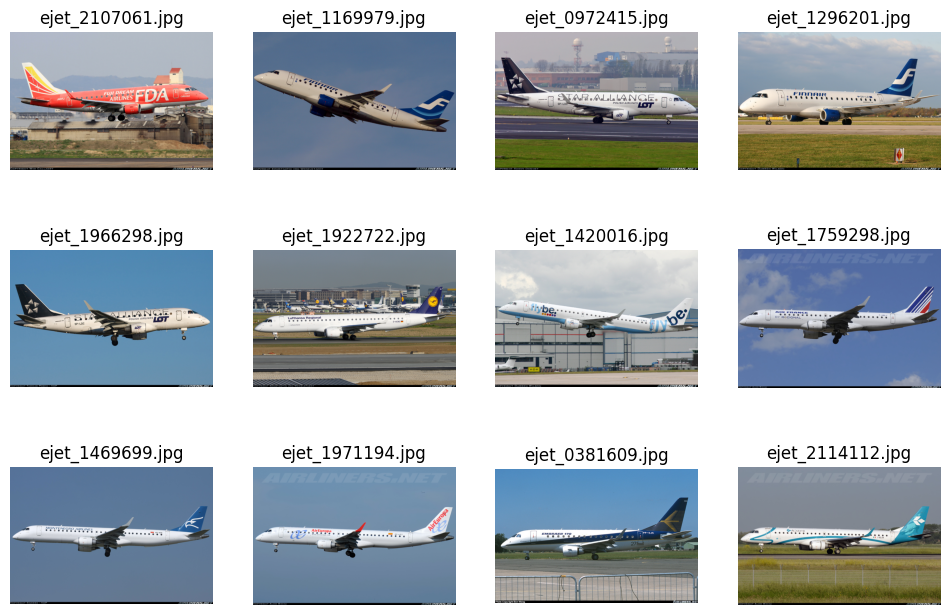

In [19]:
e_ejet_sample = np.random.choice(os.listdir(embraer_ejet_train_dir),size = 12)
plot_samples(embraer_ejet_train_dir, e_ejet_sample)

## Data augmentation to reduce overfitting

In [12]:

train_datagen = ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range = 10,
    #width_shift_range = 0.2,
    #height_shift_range = 0.2,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    #horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (600, 600),
    batch_size = 10,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (600, 600),
    batch_size = 10,
    class_mode = 'sparse',
    color_mode = 'grayscale'
)

Found 690 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [13]:
test_generator.class_indices

{'Airbus_320': 0,
 'Airbus_340': 1,
 'Airbus_380': 2,
 'Boeing_737': 3,
 'Boeing_747': 4,
 'Boeing_767': 5,
 'Embraer_ejet': 6}

## Making the sequential model

In [14]:
input_shape = (600, 600, 1)
num_classes = 7

model = Sequential([

    Conv2D(4, (3, 3), input_shape=input_shape, activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(8, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(16, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dropout(0.4),

    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 598, 598, 4)       40        
                                                                 
 max_pooling2d (MaxPooling2  (None, 299, 299, 4)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 299, 299, 4)       16        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 297, 297, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 148, 148, 8)       0         
 g2D)                                                            
                                                        

## Compile the model

In [16]:
# Compile the model
model.compile(optimizer = Adam(),
              loss = 'sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics = ['accuracy'])

## Early stopping callback()

In [17]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

## Learning rate scheduler callback()

In [18]:
def learning_rate_scheduler(epochs):

    if epochs < 10:
        return 0.001
    else:
        return 0.001 * tf.math.exp(0.1 * (10 - epochs))

In [19]:
learning_rate_schedule = LearningRateScheduler(learning_rate_scheduler)

## Fit the model

In [20]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [22]:
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

If ! train/test split already; Add validation_split=0.33 (For cross entropy validation: Alternatively choose samples between test and train split)

In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch = len(train_generator),
    epochs = 20,
    validation_data = test_generator,
    validation_steps = len(test_generator),
    callbacks = [early_stopping, learning_rate_schedule]
)

Epoch 1/20
69/69 [==============================] - 50s 598ms/step - loss: 2.1310 - accuracy: 0.1826 - val_loss: 2.1326 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 2/20
69/69 [==============================] - 42s 612ms/step - loss: 1.9107 - accuracy: 0.2449 - val_loss: 2.9168 - val_accuracy: 0.1429 - lr: 0.0010
Epoch 3/20
69/69 [==============================] - 42s 597ms/step - loss: 1.7371 - accuracy: 0.3391 - val_loss: 3.6763 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 4/20
69/69 [==============================] - 43s 613ms/step - loss: 1.7086 - accuracy: 0.3696 - val_loss: 2.1918 - val_accuracy: 0.1429 - lr: 0.0010


In [ ]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [23]:
acc = history.history['accuracy'][-1]

loss = history.history['loss'][-1]

epochs = len(history.history['accuracy'])
val_acc = history.history['val_accuracy'][-1]

print(f"accuracy: {acc}\nloss: {loss}")

accuracy: 0.3695652186870575
loss: 1.708611249923706


## Check for overfitting

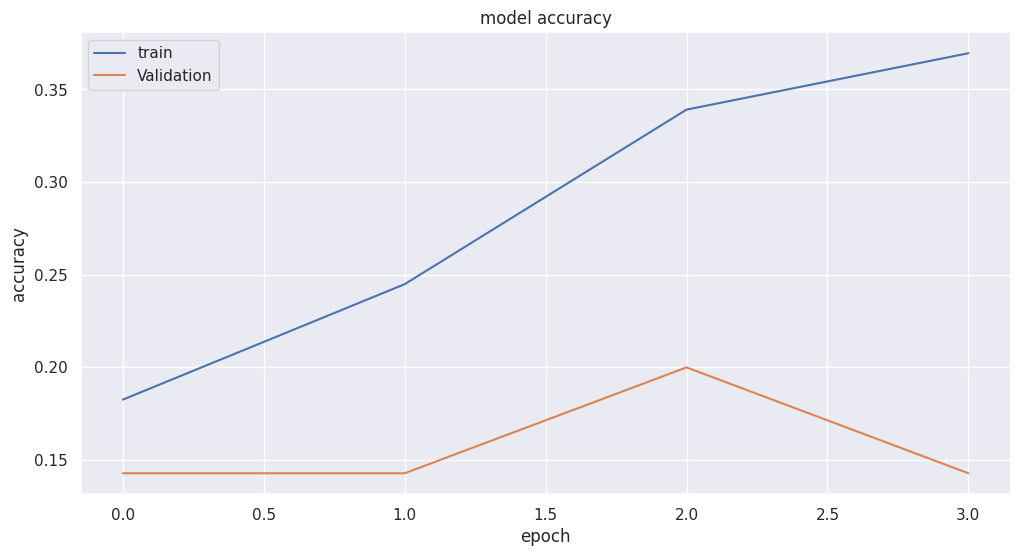

In [24]:
sns.set()
plt.figure(figsize = (12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

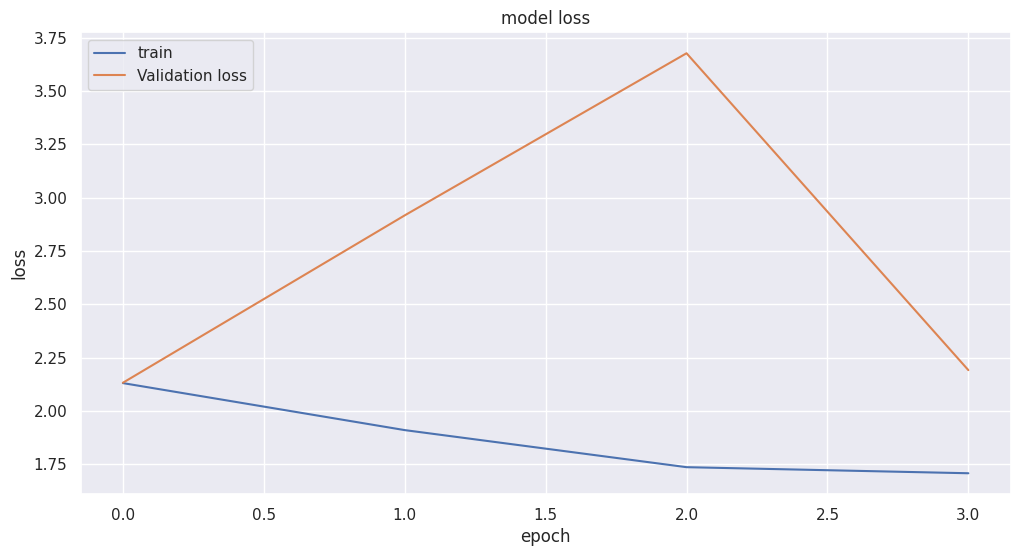

In [25]:
sns.set()
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation loss'], loc='upper left')
plt.show()

## Prédiction

In [26]:
classes = {
    0 : 'Airbus A 320',
    1 : 'Airbus A 340',
    2 : 'Airbus A 380',
    3 : 'Boeing 737',
    4 : 'Boeing 747',
    5 : 'Boeing 767',
    6 : 'Embraer E jet'
}

In [27]:
train_generator.class_indices

{'Airbus_320': 0,
 'Airbus_340': 1,
 'Airbus_380': 2,
 'Boeing_737': 3,
 'Boeing_747': 4,
 'Boeing_767': 5,
 'Embraer_ejet': 6}

In [31]:
def rgb_to_grayscale(path):

    rgb_image = Image.open(path)

    grayscale_image = rgb_image.convert('L')
    grayscale_image = np.array(grayscale_image)

    # Resize the NumPy array
    np_image = np.array(Image.fromarray(grayscale_image).resize((600, 600)))

    # Normalize the image
    np_image_nomalized = np_image / 255.0

    return np_image_nomalized

In [32]:
def predictions_test_set(path, cl : int):

    files = os.listdir(path)
    n_true = 0

    for _, filename in enumerate(files):

        if filename != '.DS_Store':

            img = rgb_to_grayscale(path + '/' + filename)
            preds_probs = model.predict(np.expand_dims(img, axis = 0))
            predicted = np.argmax(preds_probs, axis = 1)[0]

            if cl == predicted:
                n_true += 1
                print(f"True: Image: {filename}, predicted: {classes[predicted]}")
            else:
                print(f"False: Image: {filename}, predicted: {classes[predicted]}")

    print('************')
    print(f"True predictions: {n_true} / 10")

In [33]:
predictions_test_set(a_380_test_dir, 2)

1/1 [==============================] - 0s 343ms/step
True: Image: a380_1979068.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 20ms/step
True: Image: a380_9832618.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 22ms/step
True: Image: a380_9826128.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 23ms/step
True: Image: a380_9732825.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 28ms/step
True: Image: a380_9872518.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
True: Image: a380_9861562.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 23ms/step
True: Image: a380_9871652.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 24ms/step
True: Image: a380_9817263.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
True: Image: a380_9865134.jpg, predicted: Airbus A 380
1/1 [==============================]

In [34]:
predictions_test_set(a_320_test_dir, 0)

1/1 [==============================] - 0s 33ms/step
False: Image: a320_1882508.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 165ms/step
False: Image: a320_1813838.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 127ms/step
False: Image: a320_2164953.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 28ms/step
False: Image: a320_1871273.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 26ms/step
False: Image: a320_1838645.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 28ms/step
False: Image: a320_1876402.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 163ms/step
False: Image: a320_1878567.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 35ms/step
False: Image: a320_1921311.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 30ms/step
False: Image: a320_2194912.jpg, predicted: Airbus A 380
1/1 [====================

In [35]:
predictions_test_set(a_340_test_dir, 1)

1/1 [==============================] - 0s 19ms/step
False: Image: a340_1634020.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 18ms/step
False: Image: a340_1732551.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: a340_1718898.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: a340_2215390.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 18ms/step
False: Image: a340_2084805.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 18ms/step
False: Image: a340_2193516.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 18ms/step
False: Image: a340_2177828.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 21ms/step
False: Image: a340_1699455.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 23ms/step
False: Image: a340_2130085.jpg, predicted: Airbus A 380
1/1 [=======================

In [36]:
predictions_test_set(b_737_test_dir, 3)

1/1 [==============================] - 0s 19ms/step
False: Image: b737_0973082.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 20ms/step
False: Image: b737_1163792.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 20ms/step
False: Image: b737_0237107.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 21ms/step
False: Image: b737_0523207.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: b737_0558343.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: b737_0218042.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: b737_0482804.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 25ms/step
False: Image: b737_1115400.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 18ms/step
False: Image: b737_1237623.jpg, predicted: Airbus A 380
1/1 [=======================

In [37]:
predictions_test_set(b_747_test_dir, 4)

1/1 [==============================] - 0s 28ms/step
False: Image: b747_2217964.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 31ms/step
False: Image: b747_1821602.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 33ms/step
False: Image: b747_2162684.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 30ms/step
False: Image: b747_2167150.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 32ms/step
False: Image: b747_2226313.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 32ms/step
False: Image: b747_1707900.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: b747_1739526.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: b747_1896036.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 23ms/step
False: Image: b747_1864991.jpg, predicted: Airbus A 380
1/1 [=======================

In [38]:
predictions_test_set(b_767_test_dir, 5)

1/1 [==============================] - 0s 18ms/step
False: Image: b767_0981955.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 18ms/step
False: Image: b767_0087248.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 23ms/step
False: Image: b767_0940358.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: b767_2259027.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: b767_2021838.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 20ms/step
False: Image: b767_0905077.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 20ms/step
False: Image: b767_0867007.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 22ms/step
False: Image: b767_2054456.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 20ms/step
False: Image: b767_2209439.jpg, predicted: Airbus A 380
1/1 [=======================

In [39]:
predictions_test_set(embraer_ejet_test_dir, 6)

1/1 [==============================] - 0s 20ms/step
False: Image: ejet_1796759.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: ejet_2156795.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 21ms/step
False: Image: ejet_1679201.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 20ms/step
False: Image: ejet_1398982.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: ejet_1367016.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 20ms/step
False: Image: ejet_2259453.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 20ms/step
False: Image: ejet_2094472.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: ejet_1912564.jpg, predicted: Airbus A 380
1/1 [==============================] - 0s 19ms/step
False: Image: ejet_1917223.jpg, predicted: Airbus A 380
1/1 [=======================